In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)

In [3]:
from tda.experiments.mahalanobis.mahalanobis_binary import Config, run_experiment, get_feature_datasets, evaluate_detector, \
    compute_means_and_sigmas_inv, get_config, logger
from tda.models.architectures import mnist_lenet, get_architecture, mnist_mlp
from tda.models.datasets import Dataset
from tda.models import get_deep_model

2020-01-27 10:07:21,039 - Devices - INFO - Found 0 compatible with CUDA


In [4]:
config = Config(
    # Number of epochs for the model
    epochs = 50,
    # Dataset we consider (MNIST, SVHN)
    dataset = "MNIST",
    # Name of the architecture
    architecture = mnist_lenet.name,
    # Size of the dataset used for the experiment
    dataset_size = 100,
    # Type of attack (FGSM, BIM, CW)
    attack_type = "FGSM",
    # Epsilon for the preprocessing step (see the paper)
    preproc_epsilon = 0.0,
    # Noise to consider for the noisy samples
    noise = 0.0,
    # Number of sample per class to estimate mu_class and sigma_class
    number_of_samples_for_mu_sigma = 100,
    # Should we filter out non successful_adversaries
    successful_adv = 0
)

In [5]:
dataset = Dataset(name=config.dataset)

architecture = get_deep_model(
    num_epochs=config.epochs,
    dataset=dataset,
    architecture=get_architecture(config.architecture),
    train_noise=0.0
)

mean_per_class, sigma_per_class_inv = compute_means_and_sigmas_inv(
    config=config,
    dataset=dataset,
    architecture=architecture
)

2020-01-27 10:07:35,413 - Models - INFO - Filename = /Users/t.ricatte/dev/tda_for_adv_robustness/tda/../trained_models/mnist_mnist_lenet_50_epochs.model 

/Users/t.ricatte/dev/tda_env/lib/python3.6/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'tda.models.architectures.Architecture' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
2020-01-27 10:07:35,427 - Models - INFO - Loaded successfully model from /Users/t.ricatte/dev/tda_for_adv_robustness/tda/../trained_models/mnist_mnist_lenet_50_epochs.model
2020-01-27 10:07:35,428 - Mahalanobis - INFO - I am going to go through a dataset of 100 points...
2020-01-27 10:07:35,503 - Mahalanobis - INFO - All indices for features are [-1, 0, 1, 2, 3, 4, 5, 6, 7]
2020-01-27 10:07:35,503 - Mahalanobis - INFO - All classes are [0, 1, 

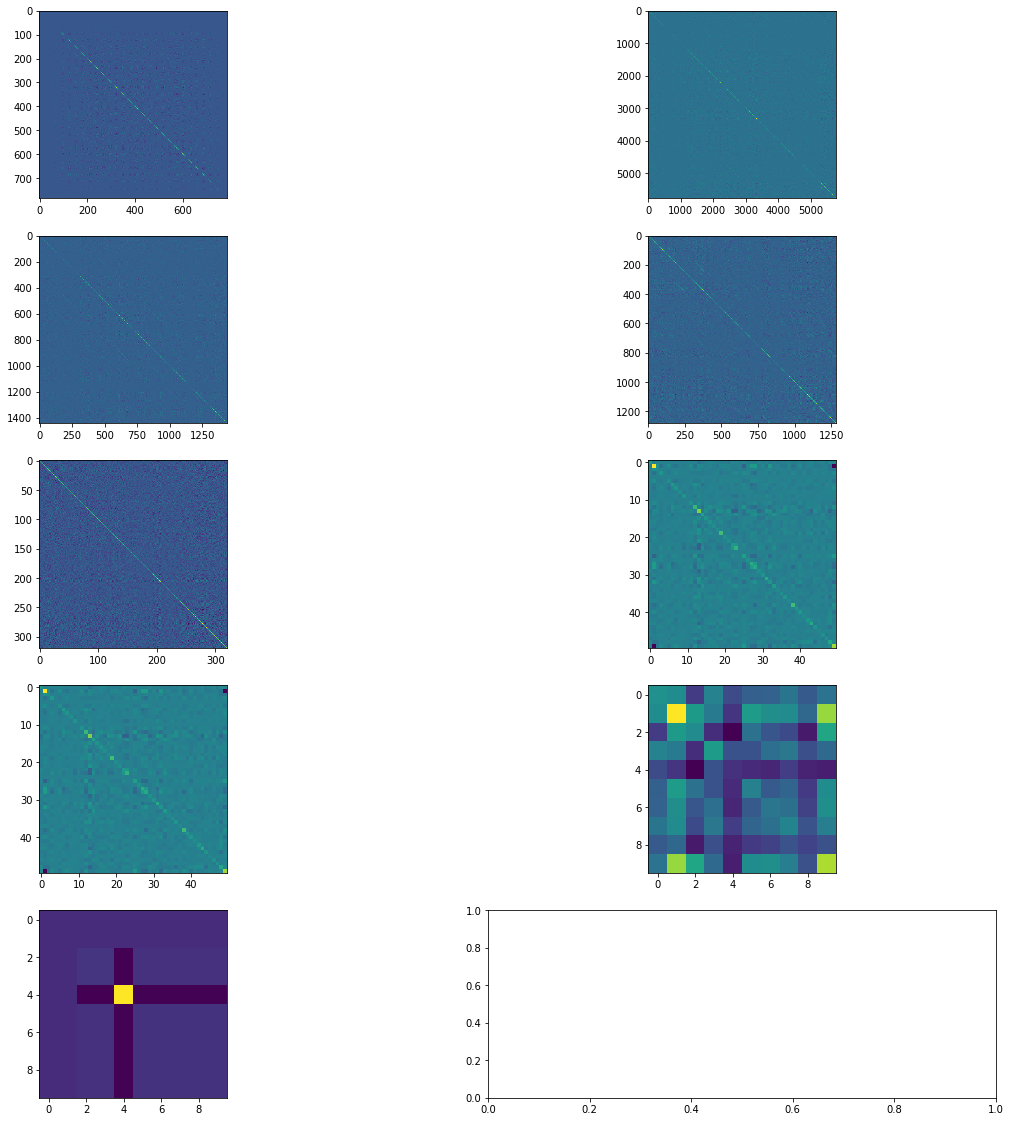

In [6]:
fig, axs = plt.subplots(len(sigma_per_class_inv)//2+1, 2)
i = 0

for layer_idx in sigma_per_class_inv:
    px = i // 2
    py = i % 2
    axs[px][py].imshow(sigma_per_class_inv[layer_idx])
    i+=1

In [ ]:
datasets = dict()
for epsilon in [0.01, 0.025, 0.05, 0.1, 0.4, 1.0]:
    ds_train, ds_test = get_feature_datasets(
        config=config,
        epsilon=epsilon,
        dataset=dataset,
        architecture=architecture,
        mean_per_class=mean_per_class,
        sigma_per_class_inv=sigma_per_class_inv
    )
    
    datasets[epsilon] = (ds_train, ds_test)

2020-01-27 10:19:53,834 - Mahalanobis - INFO - All indices for features are [-1, 0, 1, 2, 3, 4, 5, 6, 7]
2020-01-27 10:19:53,835 - Mahalanobis - INFO - All classes are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-01-27 10:19:53,836 - Mahalanobis - INFO - Evaluating epsilon=0.01 / num_iter=50
2020-01-27 10:19:53,837 - GraphDataset - INFO - Using source dataset mnist
2020-01-27 10:19:53,838 - GraphDataset - INFO - Checking that the received architecture has been trained
2020-01-27 10:19:53,838 - GraphDataset - INFO - OK ! Architecture is ready
2020-01-27 10:19:53,839 - GraphDataset - INFO - I am going to generate a dataset of 100 points...
2020-01-27 10:19:53,840 - GraphDataset - INFO - Only successful adversaries ? no
2020-01-27 10:19:53,840 - GraphDataset - INFO - Which attack ? FGSM
2020-01-27 10:19:53,849 - GraphDataset - INFO - computing sample number = 10/100
2020-01-27 10:19:53,857 - GraphDataset - INFO - computing sample number = 20/100
2020-01-27 10:19:53,865 - GraphDataset - INFO - comp

2020-01-27 10:21:10,979 - GraphDataset - INFO - computing sample number = 10/100
2020-01-27 10:21:10,992 - GraphDataset - INFO - computing sample number = 20/100
2020-01-27 10:21:11,003 - GraphDataset - INFO - computing sample number = 30/100
2020-01-27 10:21:11,014 - GraphDataset - INFO - computing sample number = 40/100
2020-01-27 10:21:11,024 - GraphDataset - INFO - computing sample number = 50/100
2020-01-27 10:21:11,034 - GraphDataset - INFO - computing sample number = 60/100
2020-01-27 10:21:11,043 - GraphDataset - INFO - computing sample number = 70/100
2020-01-27 10:21:11,054 - GraphDataset - INFO - computing sample number = 80/100
2020-01-27 10:21:11,064 - GraphDataset - INFO - computing sample number = 90/100
2020-01-27 10:21:11,072 - GraphDataset - INFO - computing sample number = 100/100
2020-01-27 10:21:11,073 - Cache - INFO - Creating cache file /Users/t.ricatte/dev/tda_for_adv_robustness/tda/../cache/get_sample_dataset/adv=False_archi=mnist_lenet_attack_type=FGSM_dataset

2020-01-27 10:22:20,445 - Cache - INFO - Creating cache file /Users/t.ricatte/dev/tda_for_adv_robustness/tda/../cache/get_sample_dataset/adv=False_archi=mnist_lenet_attack_type=FGSM_dataset=mnist_dataset_size=100_epsilon=0.4_noise=0.0_num_iter=50_succ_adv=False_train=False.cached for the call to get_sample_dataset
2020-01-27 10:22:37,140 - Mahalanobis - INFO - Generated clean dataset for detector !
2020-01-27 10:22:37,142 - GraphDataset - INFO - Using source dataset mnist
2020-01-27 10:22:37,143 - GraphDataset - INFO - Checking that the received architecture has been trained
2020-01-27 10:22:37,144 - GraphDataset - INFO - OK ! Architecture is ready
2020-01-27 10:22:37,145 - GraphDataset - INFO - I am going to generate a dataset of 100 points...
2020-01-27 10:22:37,146 - GraphDataset - INFO - Only successful adversaries ? no
2020-01-27 10:22:37,148 - GraphDataset - INFO - Which attack ? FGSM
2020-01-27 10:22:37,195 - GraphDataset - INFO - computing sample number = 10/100
2020-01-27 10:2

In [ ]:
#datasets = dict()
#for num_iter in [1, 5, 10, 20, 30, 50]:
#    ds_train, ds_test = get_feature_datasets(
#        config=config,
#        epsilon=1.0,
#        num_iter=num_iter,
#        dataset=dataset,
#        architecture=architecture,
#        mean_per_class=mean_per_class,
#        sigma_per_class_inv=sigma_per_class_inv
#    )
#    
#    datasets[num_iter] = (ds_train, ds_test)

In [ ]:
datasets[1.0][0]

## Supervised Learning

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import numpy as np

scaler = StandardScaler()

aucs = dict()
coefs = dict() 

for key in datasets:
    
    ds_train, ds_test = datasets[key]
    
    typ_detector = "LR"
    
    if typ_detector == "LR":
        detector = LogisticRegression(
        fit_intercept=True,
        verbose=0,
        tol=1e-9,
        max_iter=100000,
        solver='lbfgs'
    )
    elif typ_detector == "SVM":
        detector = SVC(
            tol=1e-5,
            C=1.0,
            kernel="rbf",
            verbose=False,
            max_iter=10000,
            gamma='scale'
        )
    else:
        raise NotImplementedError(f"Unknown detector method {typ_detector}")
        
    ds_train_scaled = scaler.fit_transform(ds_train.iloc[:, :-3])

    detector.fit(X=ds_train_scaled, y=ds_train.iloc[:, -3])
    #coef = list(detector.coef_.flatten())
    #logger.info(f"Coefs of detector {coef}")
    #logger.info(f"Intercept of detector {detector.intercept_}")
    
    ds_test_scaled = scaler.transform(ds_train.iloc[:, :-3])
    
    train_predictions = detector.predict_proba(X=ds_train_scaled)[:, 1]
    
    test_predictions = detector.predict_proba(X=ds_test_scaled)[:, 1]
    logger.info(f"Average prediction {np.mean(test_predictions)}")
    auc = roc_auc_score(y_true=ds_test.iloc[:, -3], y_score=test_predictions)
    
    logger.info(f"AUC for {key} => {auc}")

    aucs[key] = auc
    #coefs[key] = coef
    
logger.info(f"All AUCS are {aucs}")

2020-01-27 10:12:57,363 - Mahalanobis - INFO - Average prediction 0.499999329057551
2020-01-27 10:12:57,369 - Mahalanobis - INFO - AUC for 0.01 => 0.5700000000000001
2020-01-27 10:12:57,380 - Mahalanobis - INFO - Average prediction 0.5000005828767325
2020-01-27 10:12:57,384 - Mahalanobis - INFO - AUC for 0.025 => 0.6088
2020-01-27 10:12:57,396 - Mahalanobis - INFO - Average prediction 0.49999773223069943
2020-01-27 10:12:57,400 - Mahalanobis - INFO - AUC for 0.05 => 0.674
2020-01-27 10:12:57,412 - Mahalanobis - INFO - Average prediction 0.5000003600578711
2020-01-27 10:12:57,415 - Mahalanobis - INFO - AUC for 0.1 => 0.8056000000000001
2020-01-27 10:12:57,423 - Mahalanobis - INFO - Average prediction 0.4999998981506691
2020-01-27 10:12:57,426 - Mahalanobis - INFO - AUC for 0.4 => 0.9848
2020-01-27 10:12:57,434 - Mahalanobis - INFO - Average prediction 0.49999903381899896
2020-01-27 10:12:57,438 - Mahalanobis - INFO - AUC for 1.0 => 1.0
2020-01-27 10:12:57,440 - Mahalanobis - INFO - All 

In [9]:
linfs = dict()
l2s = dict()

for key in datasets:
    linf_mean_train = datasets[key][0].query("label > 0").linf_norm.mean()
    l2_mean_train = datasets[key][0].query("label > 0").l2_norm.mean()
    
    linfs[key] = linf_mean_train
    l2s[key] = l2_mean_train

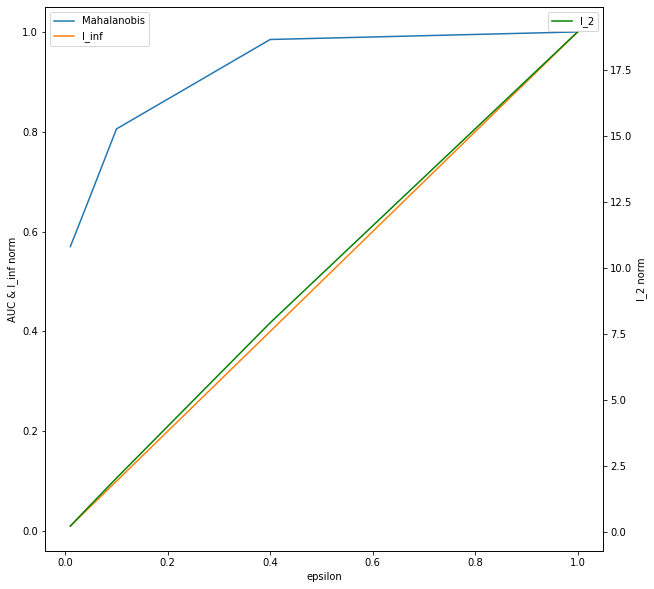

In [10]:
keys = sorted(aucs.keys())
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

fig, ax1 = plt.subplots()

ax1.set_xlabel('epsilon')
ax1.set_ylabel('AUC & l_inf norm')
#plt.xscale('log')
ax1.plot(
    keys, [aucs[k] for k in keys], label="Mahalanobis"
)
ax1.plot(
    keys, [linfs[k] for k in keys], label="l_inf"
)

ax2 = ax1.twinx()
ax2.set_ylabel("l_2 norm")

ax2.plot(
    keys, [l2s[k] for k in keys], label="l_2", color="green"
)

ax1.legend()
ax2.legend()

## Unsupervised Learning

In [11]:
from sklearn.svm import OneClassSVM

scaler = StandardScaler()

aucs = dict()
coefs = dict() 

for key in datasets:
    
    ds_train, ds_test = datasets[key]
    
    detector = OneClassSVM(
        tol=1e-5,
        kernel='rbf',
        nu=1e-4
    )
        
    ds_train_scaled = scaler.fit_transform(ds_train.iloc[:, :-3])

    detector.fit(X=ds_train_scaled)
    #coef = list(detector.coef_.flatten())
    #logger.info(f"Coefs of detector {coef}")
    #logger.info(f"Intercept of detector {detector.intercept_}")
    
    ds_test_scaled = scaler.transform(ds_train.iloc[:, :-3])
    
    train_predictions = detector.decision_function(X=ds_train_scaled)
    
    test_predictions = detector.decision_function(X=ds_test_scaled)
    logger.info(f"Average prediction {np.mean(test_predictions)}")
    auc = roc_auc_score(y_true=ds_test.iloc[:, -3], y_score=test_predictions)
    
    logger.info(f"AUC for {key} => {auc}")

    aucs[key] = auc
    #coefs[key] = coef
    
logger.info(f"All AUCS are {aucs}")

2020-01-27 10:12:58,027 - Mahalanobis - INFO - Average prediction 0.00012919273004418012
2020-01-27 10:12:58,029 - Mahalanobis - INFO - AUC for 0.01 => 0.43479999999999996
2020-01-27 10:12:58,034 - Mahalanobis - INFO - Average prediction 0.00010668490554875402
2020-01-27 10:12:58,036 - Mahalanobis - INFO - AUC for 0.025 => 0.504
2020-01-27 10:12:58,040 - Mahalanobis - INFO - Average prediction 0.00011962682756302922
2020-01-27 10:12:58,042 - Mahalanobis - INFO - AUC for 0.05 => 0.5468
2020-01-27 10:12:58,047 - Mahalanobis - INFO - Average prediction 0.00014804477973284782
2020-01-27 10:12:58,049 - Mahalanobis - INFO - AUC for 0.1 => 0.5419999999999999
2020-01-27 10:12:58,053 - Mahalanobis - INFO - Average prediction 0.000171732504597091
2020-01-27 10:12:58,055 - Mahalanobis - INFO - AUC for 0.4 => 0.5156000000000001
2020-01-27 10:12:58,061 - Mahalanobis - INFO - Average prediction 0.0002317050126442517
2020-01-27 10:12:58,063 - Mahalanobis - INFO - AUC for 1.0 => 0.686
2020-01-27 10:12

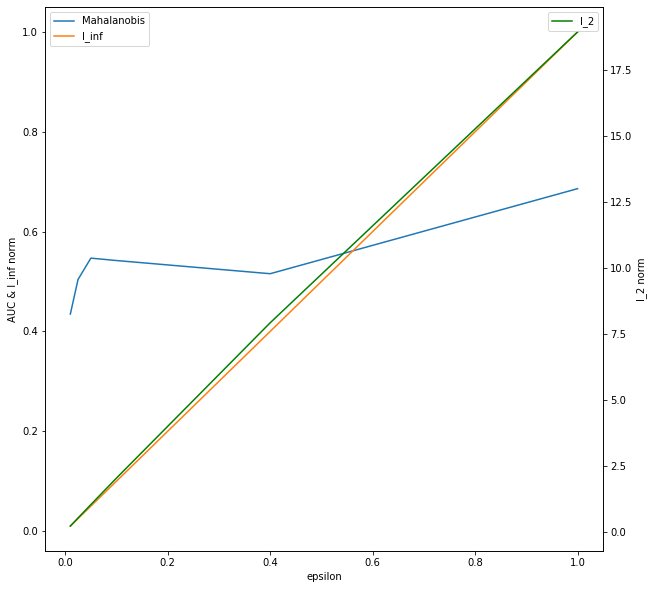

In [12]:
keys = sorted(aucs.keys())
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

fig, ax1 = plt.subplots()

ax1.set_xlabel('epsilon')
ax1.set_ylabel('AUC & l_inf norm')
#plt.xscale('log')
ax1.plot(
    keys, [aucs[k] for k in keys], label="Mahalanobis"
)
ax1.plot(
    keys, [linfs[k] for k in keys], label="l_inf"
)

ax2 = ax1.twinx()
ax2.set_ylabel("l_2 norm")

ax2.plot(
    keys, [l2s[k] for k in keys], label="l_2", color="green"
)

ax1.legend()
ax2.legend()